# **Project: Clothing Image Classifier Using Machine Learning and Neural Networks**

This project focuses on building an image classifier for clothing items using machine learning techniques, specifically a fully connected neural network. The classifier will categorize images of various clothing types—such as shirts, pants, and dresses—into distinct classes, aiming for high accuracy and efficient performance.

## **Objectives:**

	•	Develop a robust image classifier that can automatically identify different types of clothing.
	•	Utilize this classifier for applications such as:
	    •	Automated sorting of clothing in e-commerce and retail environments.
	    •	Enhancing fashion recommendation systems.
	    •	Implementing visual search for clothing items.


## **Key Features:**

1.   Data Preprocessing & Augmentation:
  *   Prepare the dataset by normalizing and augmenting images to improve model generalization.


2.   Model Selection & Training:
  *   Implement a fully connected neural network to classify the images.

3.	Model Evaluation:
	*   Assess the classifier’s performance through accuracy, precision, and other metrics on unseen data.

4.	Future Plans:
	* Explore upgrading the model to a Convolutional Neural Network (CNN) to further improve accuracy and performance.
	* Integrate the model into real-world applications, such as web interfaces or mobile apps, enabling users to interact with the classifier.


In [3]:
!pip install tensorflow tensorflow-datasets

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

print("tensorflow version: ", tf.__version__)
print("tf dataset version: ", tfds.__version__)


tensorflow version:  2.17.0
tf dataset version:  4.9.6


In [6]:
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
metadata

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.F0GO24_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.F0GO24_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmpxein7ucstfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [8]:
training_data, testing_data = data['train'], data['test']

In [9]:
labels_names = metadata.features['label'].names
labels_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
# Normalize image data by converting pixel values from the range 0-255 to 0-1
# This process ensures that the model trains more efficiently by standardizing the input data.
# Additionally, the images are converted from color to grayscale (Black & White).


def normalization(img, labels):
  img = tf.cast(img, tf.float32)
  img /= 255
  return img, labels

# Apply normalization to training and testing datasets
# Normalizing both training and testing data ensures consistency during model evaluation
training_data = training_data.map(normalization)
testing_data = testing_data.map(normalization)

# Add caching to improve training speed by storing data in memory after the first epoch.
# This avoids reloading the data from disk in subsequent epochs, making the process faster.
training_data = training_data.cache()
testing_data = testing_data.cache()


image shape:  (28, 28)


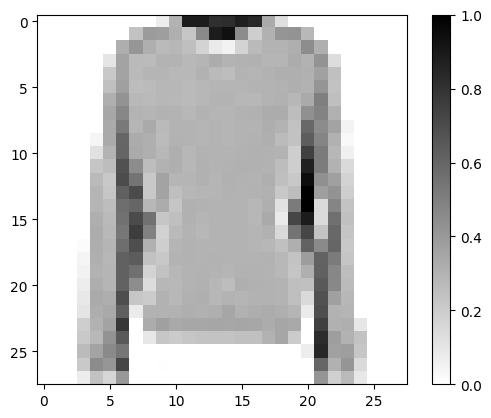

In [12]:
# Take a single batch of image and label from the training dataset
for img, label in training_data.take(1):
    break

# Convert the image to a NumPy array and reshape it to 28x28 pixels
# This is necessary to visualize the image, as the original format is not directly compatible with matplotlib.
img = img.numpy().reshape((28, 28))
print("Image shape:", img.shape)

# Install matplotlib for visualizing the image (if not already installed)
!pip install matplotlib

# Import the required library for plotting images
import matplotlib.pyplot as plt

# Display the image using matplotlib with a grayscale colormap ('binary')
# The colorbar shows the intensity scale, and the grid is disabled for a cleaner display.
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)  # Use grayscale color map
plt.colorbar()  # Add color scale on the side
plt.grid(False)  # Disable grid
plt.show()  # Display the image

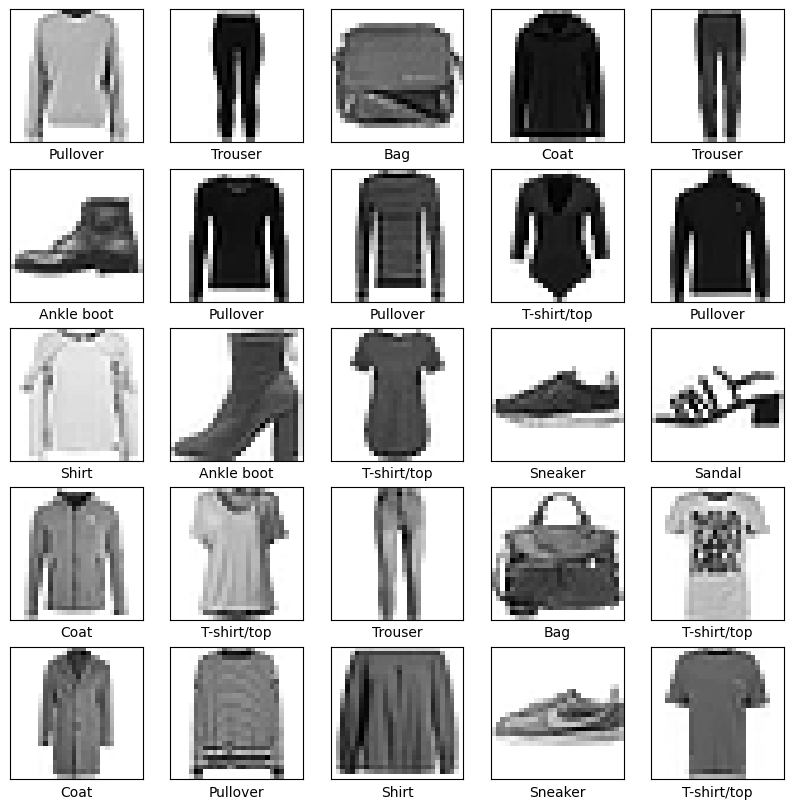

In [13]:
# Checking labels and image correlation

plt.figure(figsize=(10,10))
for i, (img, label) in enumerate(training_data.take(25)):
  img = img.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(labels_names[label])
plt.show()

In [15]:

# Define the Sequential model architecture
model = tf.keras.Sequential([
    # 1
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    # 2
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # 3
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # 4
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# 1.- Flatten the input image from a 28x28x1 tensor to a 1D vector (784,)
    # The input shape (28, 28, 1) corresponds to 28x28 pixel grayscale images (1 channel for Black & White)

# 2.- First fully connected (Dense) layer with 50 neurons and ReLU activation function
    # ReLU helps the model capture non-linear patterns

 # 3.- Second fully connected (Dense) layer with 50 neurons and ReLU activation
    # Adding more layers increases the model's capacity to learn complex patterns

 # 4.- Output layer with 10 neurons (one for each class) and softmax activation for classification
    # Softmax converts the output into probabilities for multi-class classification (10 classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compile Model
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [17]:
#Checking training and testing numbers

num_training = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples

print("Number of training images: {}".format(num_training))
print("Number of testing images: {}".format(num_test))

Number of training images: 60000
Number of testing images: 10000


In [18]:
BATCH_SIZE = 32

training_data = training_data.cache().repeat().shuffle(num_training).batch(BATCH_SIZE)
testing_data = testing_data.cache().batch(BATCH_SIZE)

In [24]:
import math

# Train model
history_model = model.fit(training_data, epochs=5, steps_per_epoch=math.ceil(num_training/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9065 - loss: 0.2474
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9064 - loss: 0.2471
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9105 - loss: 0.2370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9110 - loss: 0.2346
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9138 - loss: 0.2308


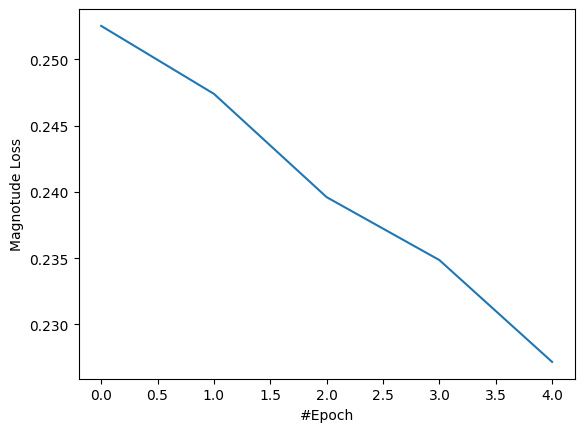

In [25]:
plt.xlabel('#Epoch')
plt.ylabel('Magnotude Loss')
plt.plot(history_model.history['loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


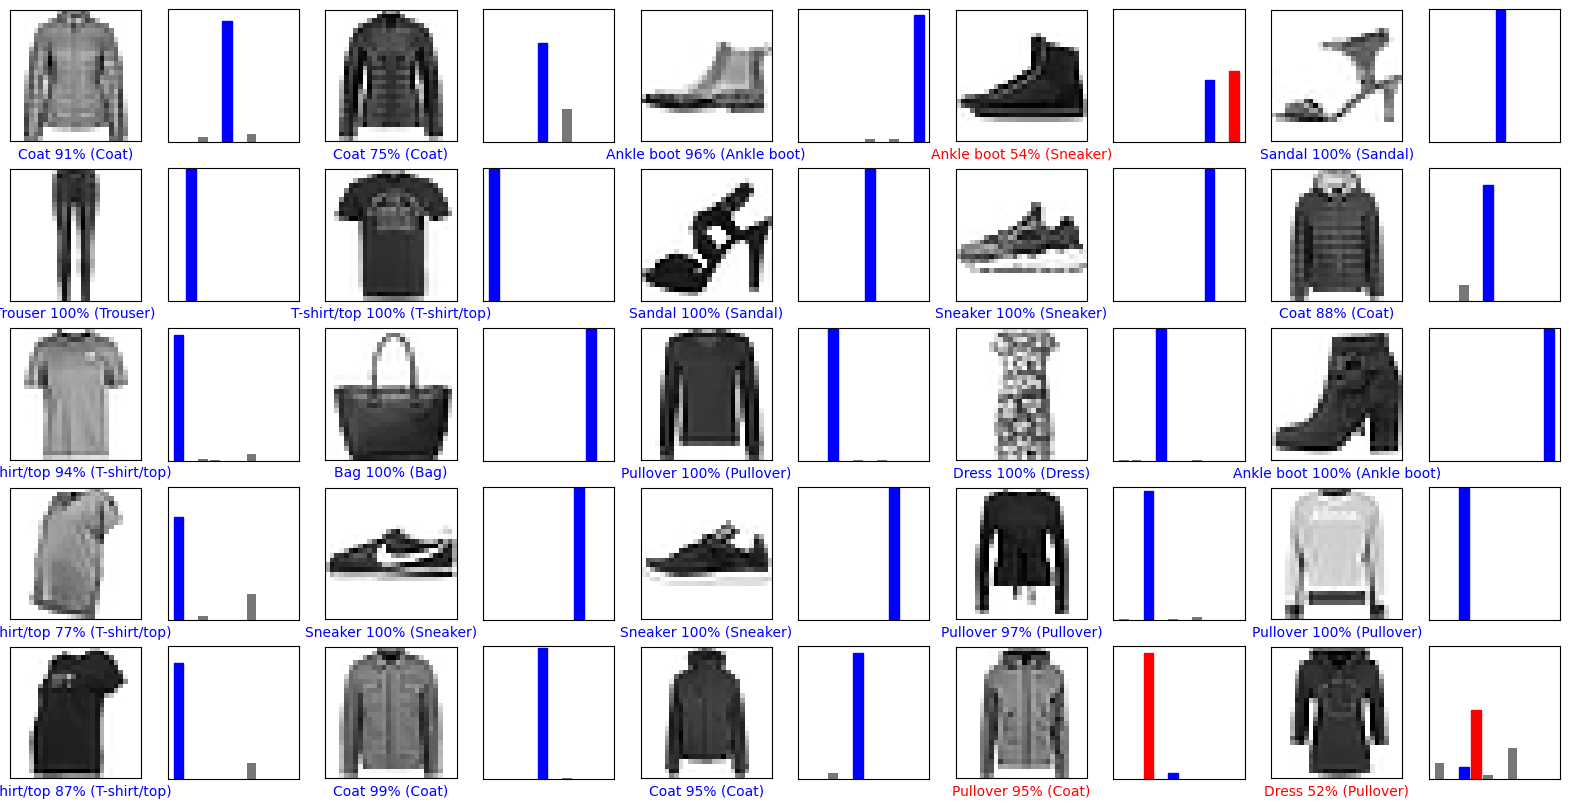

In [29]:
# Plot a grid of images with predictions, marking correct (blue) and incorrect (red) classifications
import numpy as np
import matplotlib.pyplot as plt

# Fetch a batch of test images and labels for visualization
for test_images, test_labels in testing_data.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

# Function to plot a single image with its prediction label
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)  # Disable grid
    plt.xticks([])   # Disable x-axis ticks
    plt.yticks([])   # Disable y-axis ticks

    # Display the image in grayscale
    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    # Get the predicted label
    predicted_label = np.argmax(predictions_array)

    # Set color to blue if prediction is correct, red if incorrect
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Display label, prediction probability, and true label
    plt.xlabel("{} {:2.0f}% ({})".format(labels_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         labels_names[true_label]),
               color=color)

# Function to plot a bar chart showing prediction probabilities for each class
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)  # Disable grid
    plt.xticks([])   # Disable x-axis ticks
    plt.yticks([])   # Disable y-axis ticks

    # Create a bar chart for the prediction probabilities
    bars = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])  # Set y-axis limit to range between 0 and 1

    # Highlight the predicted label (red) and the true label (blue)
    predicted_label = np.argmax(predictions_array)
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')

# Set up a grid of 5x5 images (25 total images)
rows = 5
cols = 5
num_images = rows * cols

plt.figure(figsize=(2 * 2 * cols, 2 * rows))  # Set figure size
for i in range(num_images):
    # Plot the image with prediction
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)

    # Plot the bar chart with prediction probabilities
    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)